# Project 5: Comunicate Data Findings
Udacity Data Analyst Nanodegree <br> Jean Carlos da Cruz

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gather</a></li>
<li><a href="#assess">Assess</a></li>
<li><a href="#clean">Clean</a></li>
<li><a href="#analysis">Exploratory Analysis</a></li>    
</ul>

<a id='intro'></a>
## Introduction
> In this project we will gather data, analyze and create visualizations  about reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, for the year of 2007, I decide to analyse this particular year because was the year I first started college. For that, data will be gathered via manual download from the ASA Section on Statistical Computing. After that we will assess this data, find possible issues on it and then clean these issues to get a smooth master dataframe to be used to create visualizations and deliver insights.

In [ ]:
#Getting all the libraries we will need in this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import timeit
import glob
pd.set_option('display.max_columns', 500)

%matplotlib inline

<a id='gather'></a>
## Gather

#### Data Gathering
1. ASA Section on Statistical Computing - flight arrival and departure details for all commercial flights within the USA, from year 2007.(2007.csv.bz2)
File downloaded from https://community.amstat.org/jointscsg-section/dataexpo/dataexpo2009.

In [ ]:
#Getting the data into a dataframe
df = pd.read_csv('2007.csv.bz2' , compression='bz2')

In [ ]:
#Copying the dataframe
df2007=df.copy()

<a id='assess'></a>
## Assess

In [ ]:
#Getting the first 5 rows
df2007.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,N351,69.0,75.0,54.0,1.0,7.0,SMF,ONT,389,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,N370,85.0,90.0,74.0,8.0,13.0,SMF,PDX,479,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,N685,88.0,90.0,73.0,34.0,36.0,SMF,PDX,479,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,N364,86.0,90.0,75.0,26.0,30.0,SMF,PDX,479,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,N480,86.0,90.0,74.0,-3.0,1.0,SMF,PDX,479,3,9,0,NaN,0,0,0,0,0,0


In [ ]:
# Checking the datatypes of the columns
df2007.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn                 int64
TaxiOut                int64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay           int64
WeatherDelay           int64
NASDelay               int64
SecurityDelay          int64
LateAircraftDelay      int64
dtype: object

In [ ]:
#Checking the dimensions of the dataframe
df2007.shape

(7453215, 29)

In [ ]:
#Checking the number of unique values in each column
df2007.nunique()

Year                    1
Month                  12
DayofMonth             31
DayOfWeek               7
DepTime              1439
CRSDepTime           1188
ArrTime              1440
CRSArrTime           1398
UniqueCarrier          20
FlightNum            7596
TailNum              5505
ActualElapsedTime     692
CRSElapsedTime        561
AirTime               667
ArrDelay             1232
DepDelay             1226
Origin                304
Dest                  310
Distance             1438
TaxiIn                202
TaxiOut               334
Cancelled               2
CancellationCode        4
Diverted                2
CarrierDelay         1045
WeatherDelay          623
NASDelay              570
SecurityDelay         179
LateAircraftDelay     585
dtype: int64

In [ ]:
#Checking for nulls in the dataset
df2007.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               160748
CRSDepTime                 0
ArrTime               177927
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                   22
ActualElapsedTime     177927
CRSElapsedTime           994
AirTime               177927
ArrDelay              177927
DepDelay              160748
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     7292466
Diverted                   0
CarrierDelay               0
WeatherDelay               0
NASDelay                   0
SecurityDelay              0
LateAircraftDelay          0
dtype: int64

In [ ]:
#Checking for duplicates in the data
df2007.duplicated().sum()

27

In [ ]:
#Checking infomation on datatypes of columns and missing values.
df2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453215 entries, 0 to 7453214
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay      

In [ ]:
#Checking summary statistics
df2007.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7453215.0,7.453215e+06,7.453215e+06,7.453215e+06,7.292467e+06,7.453215e+06,7.275288e+06,7.453215e+06,7.453215e+06,7.275288e+06,7.452221e+06,7.275288e+06,7.275288e+06,7.292467e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06
mean,2007.0,6.514876e+00,1.572589e+01,3.933804e+00,1.339221e+03,1.330596e+03,1.482105e+03,1.495392e+03,2.188099e+03,1.263223e+02,1.272502e+02,1.028159e+02,1.019218e+01,1.139914e+01,7.198058e+02,6.691984e+00,1.630015e+01,2.156761e-02,2.304911e-03,3.865236e+00,7.700904e-01,3.783702e+00,2.373553e-02,5.099134e+00
std,0.0,3.425117e+00,8.781154e+00,1.992267e+00,4.798528e+02,4.647080e+02,5.072241e+02,4.815902e+02,1.971958e+03,7.118009e+01,7.035750e+01,6.824577e+01,3.930774e+01,3.614189e+01,5.623051e+02,5.151351e+00,1.183396e+01,1.452668e-01,4.795413e-02,2.084240e+01,9.619547e+00,1.617670e+01,1.084995e+00,2.127753e+01
min,2007.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,-1.240000e+03,0.000000e+00,-3.120000e+02,-3.050000e+02,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007.0,4.000000e+00,8.000000e+00,2.000000e+00,9.300000e+02,9.300000e+02,1.107000e+03,1.115000e+03,5.900000e+02,7.600000e+01,7.700000e+01,5.500000e+01,-9.000000e+00,-4.000000e+00,3.190000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2007.0,7.000000e+00,1.600000e+01,4.000000e+00,1.329000e+03,1.322000e+03,1.513000e+03,1.520000e+03,1.509000e+03,1.080000e+02,1.100000e+02,8.400000e+01,0.000000e+00,0.000000e+00,5.690000e+02,5.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2007.0,9.000000e+00,2.300000e+01,6.000000e+00,1.733000e+03,1.720000e+03,1.911000e+03,1.906000e+03,3.553000e+03,1.560000e+02,1.560000e+02,1.310000e+02,1.400000e+01,1.100000e+01,9.460000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2007.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.602000e+03,1.270000e+03,1.430000e+03,1.257000e+03,2.598000e+03,2.601000e+03,4.962000e+03,5.450000e+02,5.300000e+02,1.000000e+00,1.000000e+00,2.580000e+03,1.429000e+03,1.386000e+03,3.820000e+02,1.031000e+03


In [ ]:
#Cheking the carrier names
df2007.UniqueCarrier.value_counts()

WN    1168871
AA     633857
OO     597882
MQ     540494
UA     490002
US     485447
DL     475889
XE     434773
NW     414526
CO     323151
YV     294362
EV     286234
FL     263159
9E     258851
OH     233787
B6     191450
AS     160185
F9      97760
HA      56175
AQ      46360
Name: UniqueCarrier, dtype: int64

In [ ]:
#Cheking the number of cancelled flights
df2007.Cancelled.value_counts()

0    7292467
1     160748
Name: Cancelled, dtype: int64

In [ ]:
#Checking if all canceled flights have cancelation code
df_cancelled = df2007.query("Cancelled == '1'")
df_cancelled.CancellationCode.value_counts()

A    66779
B    61935
C    31995
D       39
Name: CancellationCode, dtype: int64

In [ ]:
#Making Sure there is no null data in cancellation code
df_cancelled.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime              160748
CRSDepTime                0
ArrTime              160748
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                  22
ActualElapsedTime    160748
CRSElapsedTime          267
AirTime              160748
ArrDelay             160748
DepDelay             160748
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay              0
WeatherDelay              0
NASDelay                  0
SecurityDelay             0
LateAircraftDelay         0
dtype: int64

In [ ]:
#Checking if all flights with elapsedtime missing are the ones that were cancelled
df_cancelled.ActualElapsedTime.value_counts()

Series([], Name: ActualElapsedTime, dtype: int64)

In [ ]:
#Checking if all flights with airtime missing are the ones that were cancelled
df_cancelled.AirTime.value_counts()

Series([], Name: AirTime, dtype: int64)

<a id='clean'></a>
## Clean

#### Cleaning Steps:
<ul>
<li> 1. Change the date format from int to str in year, month, dayofmonth and dayofweek columns;</li>
<li> 2. Change the flight number column to str;</li>     
<li> 3. Remove unnecessary columns;</li>
<li> 4. Remove the duplicated rows;</li>
<li> 5. Change the carrier from codes to full names;</li>




In [ ]:
#1. Change the date format from int to str in year, month, dayofmonth and dayofweek columns
df2007['Year'] = df2007['Year'].astype(str)
df2007['Month'] = df2007['Month'].astype(str)
df2007['DayofMonth'] = df2007['DayofMonth'].astype(str)
df2007['DayOfWeek'] = df2007['DayOfWeek'].astype(str)

In [ ]:
#2. Change the flight number column to str
df2007['FlightNum'] = df2007['FlightNum'].astype(str)

In [ ]:
#3. Remove unnecessary columns
# Columns that can be deleted
deleted_columns = [ 'TailNum', 'TaxiIn' , 'TaxiOut' , 'Diverted' ]
# Dropping the columns from the dataframe
df2007.drop(deleted_columns, axis=1, inplace=True)

In [ ]:
#4. Remove the duplicated rows (Keeping the first one)
df2007.drop_duplicates(keep = 'first', inplace = True)

In [ ]:
#5. Change the carrier from codes to full names
vals_to_replace = {'WN':'Southwest Airlines', 
                   'AA':'American Airlines', 
                   'OO':'SkyWest Airlines',
                   'MQ':'Envoy Air',
                   'UA':'United Airlines',
                   'US':'US Airways',
                   'DL':'Delta Air Lines',
                   'XE':'JetSuiteX',
                   'NW':'NorthWest Airlines',
                   'CO':'Continental Airlines',
                   'YV':'Mesa Airlines',
                   'EV':'ExpressJet Airlines',
                   'FL':'AirTran Airways',
                   '9E':'Endeavor',
                   'OH':'PSA Airlines',
                   'B6':'JetBlue Airlines',
                   'AS':'Alaska Airlines',
                   'F9':'Frontier Airlines',
                   'HA':'Hawaiian Airlines',
                   'AQ':'9 Air Co Ltd',}
df2007['UniqueCarrier'] = df2007['UniqueCarrier'].map(vals_to_replace)
#Source of the codes and full names: https://www.iata.org/en/publications/directories/code-search/?airline.search=YV


<a id='analysis'></a>
## Analysis

#### Univariate Analysis:


What was the distance elapsed per flight?

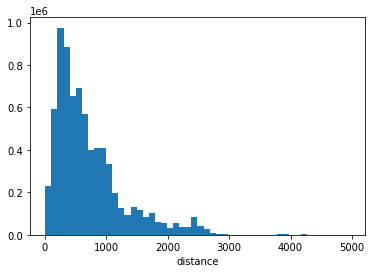

In [ ]:
#Checking the distribution of the distances per flight
plt.hist(data = df, x = "Distance", bins = 50)
plt.xlabel("distance");

Looks like there were some flights that seemed to run large distances. We should look into them.

In [ ]:
#Getting the number of flights with more than 3.000 miles
df2007[ df2007.Distance > 3500].shape[0]

8508

In [ ]:
#Checking a sample of those flights
df2007[ df2007.Distance > 3500].head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
224391,2007,1,1,1,1019.0,1015,1457.0,1521,United Airlines,1,518.0,546.0,500.0,-24.0,4.0,ORD,HNL,4243,0,NaN,0,0,0,0,0
224392,2007,1,2,2,1030.0,1015,1448.0,1521,United Airlines,1,498.0,546.0,477.0,-33.0,15.0,ORD,HNL,4243,0,NaN,0,0,0,0,0
224393,2007,1,3,3,1018.0,1015,1507.0,1521,United Airlines,1,529.0,546.0,501.0,-14.0,3.0,ORD,HNL,4243,0,NaN,0,0,0,0,0
224394,2007,1,4,4,1022.0,1015,1626.0,1521,United Airlines,1,604.0,546.0,564.0,65.0,7.0,ORD,HNL,4243,0,NaN,7,0,58,0,0
224395,2007,1,5,5,1018.0,1015,1537.0,1521,United Airlines,1,559.0,546.0,521.0,16.0,3.0,ORD,HNL,4243,0,NaN,0,0,16,0,0


Which airports had departure flights that elapsed more than 3500 miles?

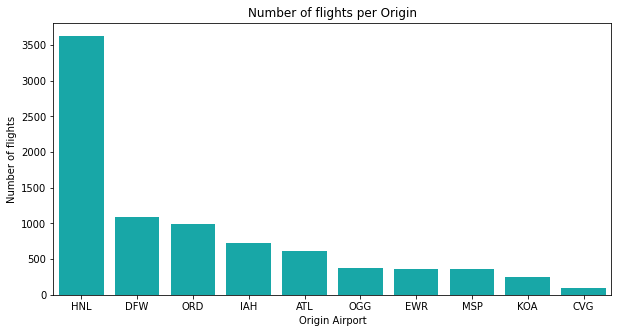

In [ ]:
#Checking the origin of those flights
df_origin = df2007[ df2007.Distance > 3500].Origin.value_counts().to_frame()
df_origin = df_origin.reset_index()
df_origin.columns = ['Origin', 'Count_of_flights'] # change column names
df_origin
#Creating a bar plot
f,ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='Origin', y='Count_of_flights' , data=df_origin, color='c')
ax.set(title='Number of flights per Origin', xlabel='Origin Airport', ylabel="Number of flights")
plt.show()

HNL is the airport with more flights that elapsed more than 3500 miles. It makes sense since HNL in a Hawaii Airport

How about destinations? Hawaii airport are also the most frequent when it comes to distances higher than 3500 miles?

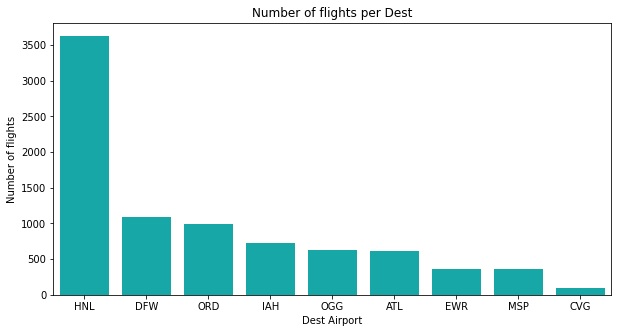

In [ ]:
#Checking the destination of those flights
df_dest = df2007[ df2007.Distance > 3500].Dest.value_counts().to_frame()
df_dest = df_dest.reset_index()
df_dest.columns = ['Dest', 'Count_of_flights'] # change column names
df_dest
#Creating a bar plot
f,ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='Dest', y='Count_of_flights' , data=df_dest, color='c')
ax.set(title='Number of flights per Dest', xlabel='Dest Airport', ylabel="Number of flights")
plt.show()

Seems like most long flights departured and arrived from Hawaai.

How is the distribution of arrival delays?

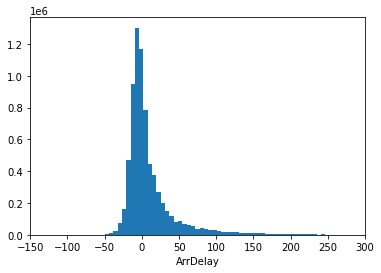

In [ ]:
#Checking the distribution of the arrival delay
plt.hist(data = df2007, x = "ArrDelay", bins=500)
plt.xlabel("ArrDelay");
plt.xlim([-150,300]);

Looks like there is many flights with arrivel delay negative. I can't tell for sure, but I'm assuming when the delay is negative the flight actually arrived before the scheduled time. For me it was surprising to see that there are this number of flights with negative arrival delays.

How is the distribution of departure delays?

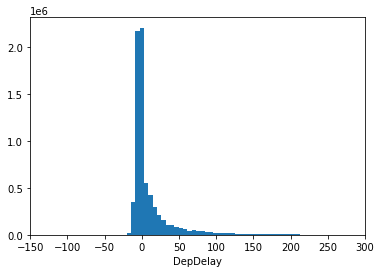

In [ ]:
#Checking the distribution of the departure delay
plt.hist(data = df2007, x = "DepDelay", bins=500)
plt.xlabel("DepDelay");
plt.xlim([-150,300]);

There is some flights with departure delays with more than 200 minutes. But, how many?

In [ ]:
df2007[ df2007.DepDelay > 200].shape[0]

41556

Is there flights that departure before scheduled time? Let's check.

In [ ]:
df2007[ df2007.DepDelay < -1].shape[0]

3047256

WoW! That's a lot of flights departuring early. What was the maximum time a flight departure before scheduled time?

In [ ]:
df2007[ df2007.DepDelay < -1].DepDelay.min()

-305.0

That seems weird. 5 hours in advance? Lets remove this flight from the dataset, looks like a outlier

In [ ]:
df2007[ df2007.DepDelay < -300].head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
556642,2007,1,4,4,1302.0,1807,1350.0,1902,Alaska Airlines,139,48.0,55.0,41.0,-312.0,-305.0,AKN,ANC,289,0,NaN,0,0,0,0,0


In [ ]:
#Removing this flight 
df2007 = df2007[(df2007.DepDelay > -300)]

#### Bivariate Analysis:


How is the correlation between all variable numerics in the dataset? Are some of them strongly correlated?

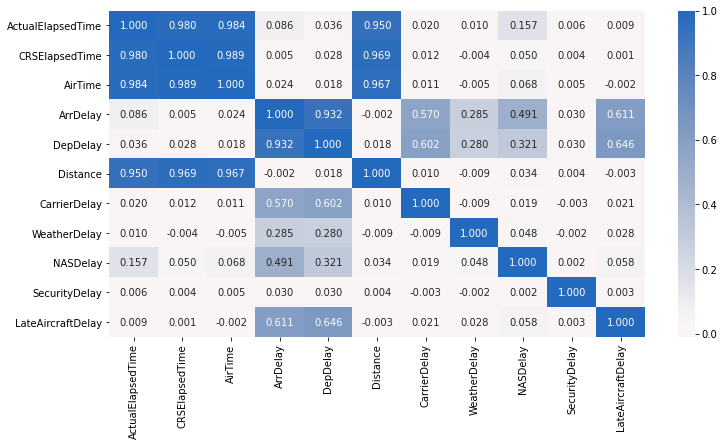

In [ ]:
#Checking the Correlation between numeric variables using a correlation matrix
numeric_vars = ["ActualElapsedTime",
                "CRSElapsedTime",
                "AirTime",
                "ArrDelay",
                "DepDelay",
                "Distance",
                "CarrierDelay",
                "WeatherDelay",
                "NASDelay",
                "SecurityDelay",
                "LateAircraftDelay"]
plt.figure(figsize=[12,6])
sns.heatmap(df[numeric_vars].corr(), annot=True, fmt=".3f", cmap="vlag_r", center=0);

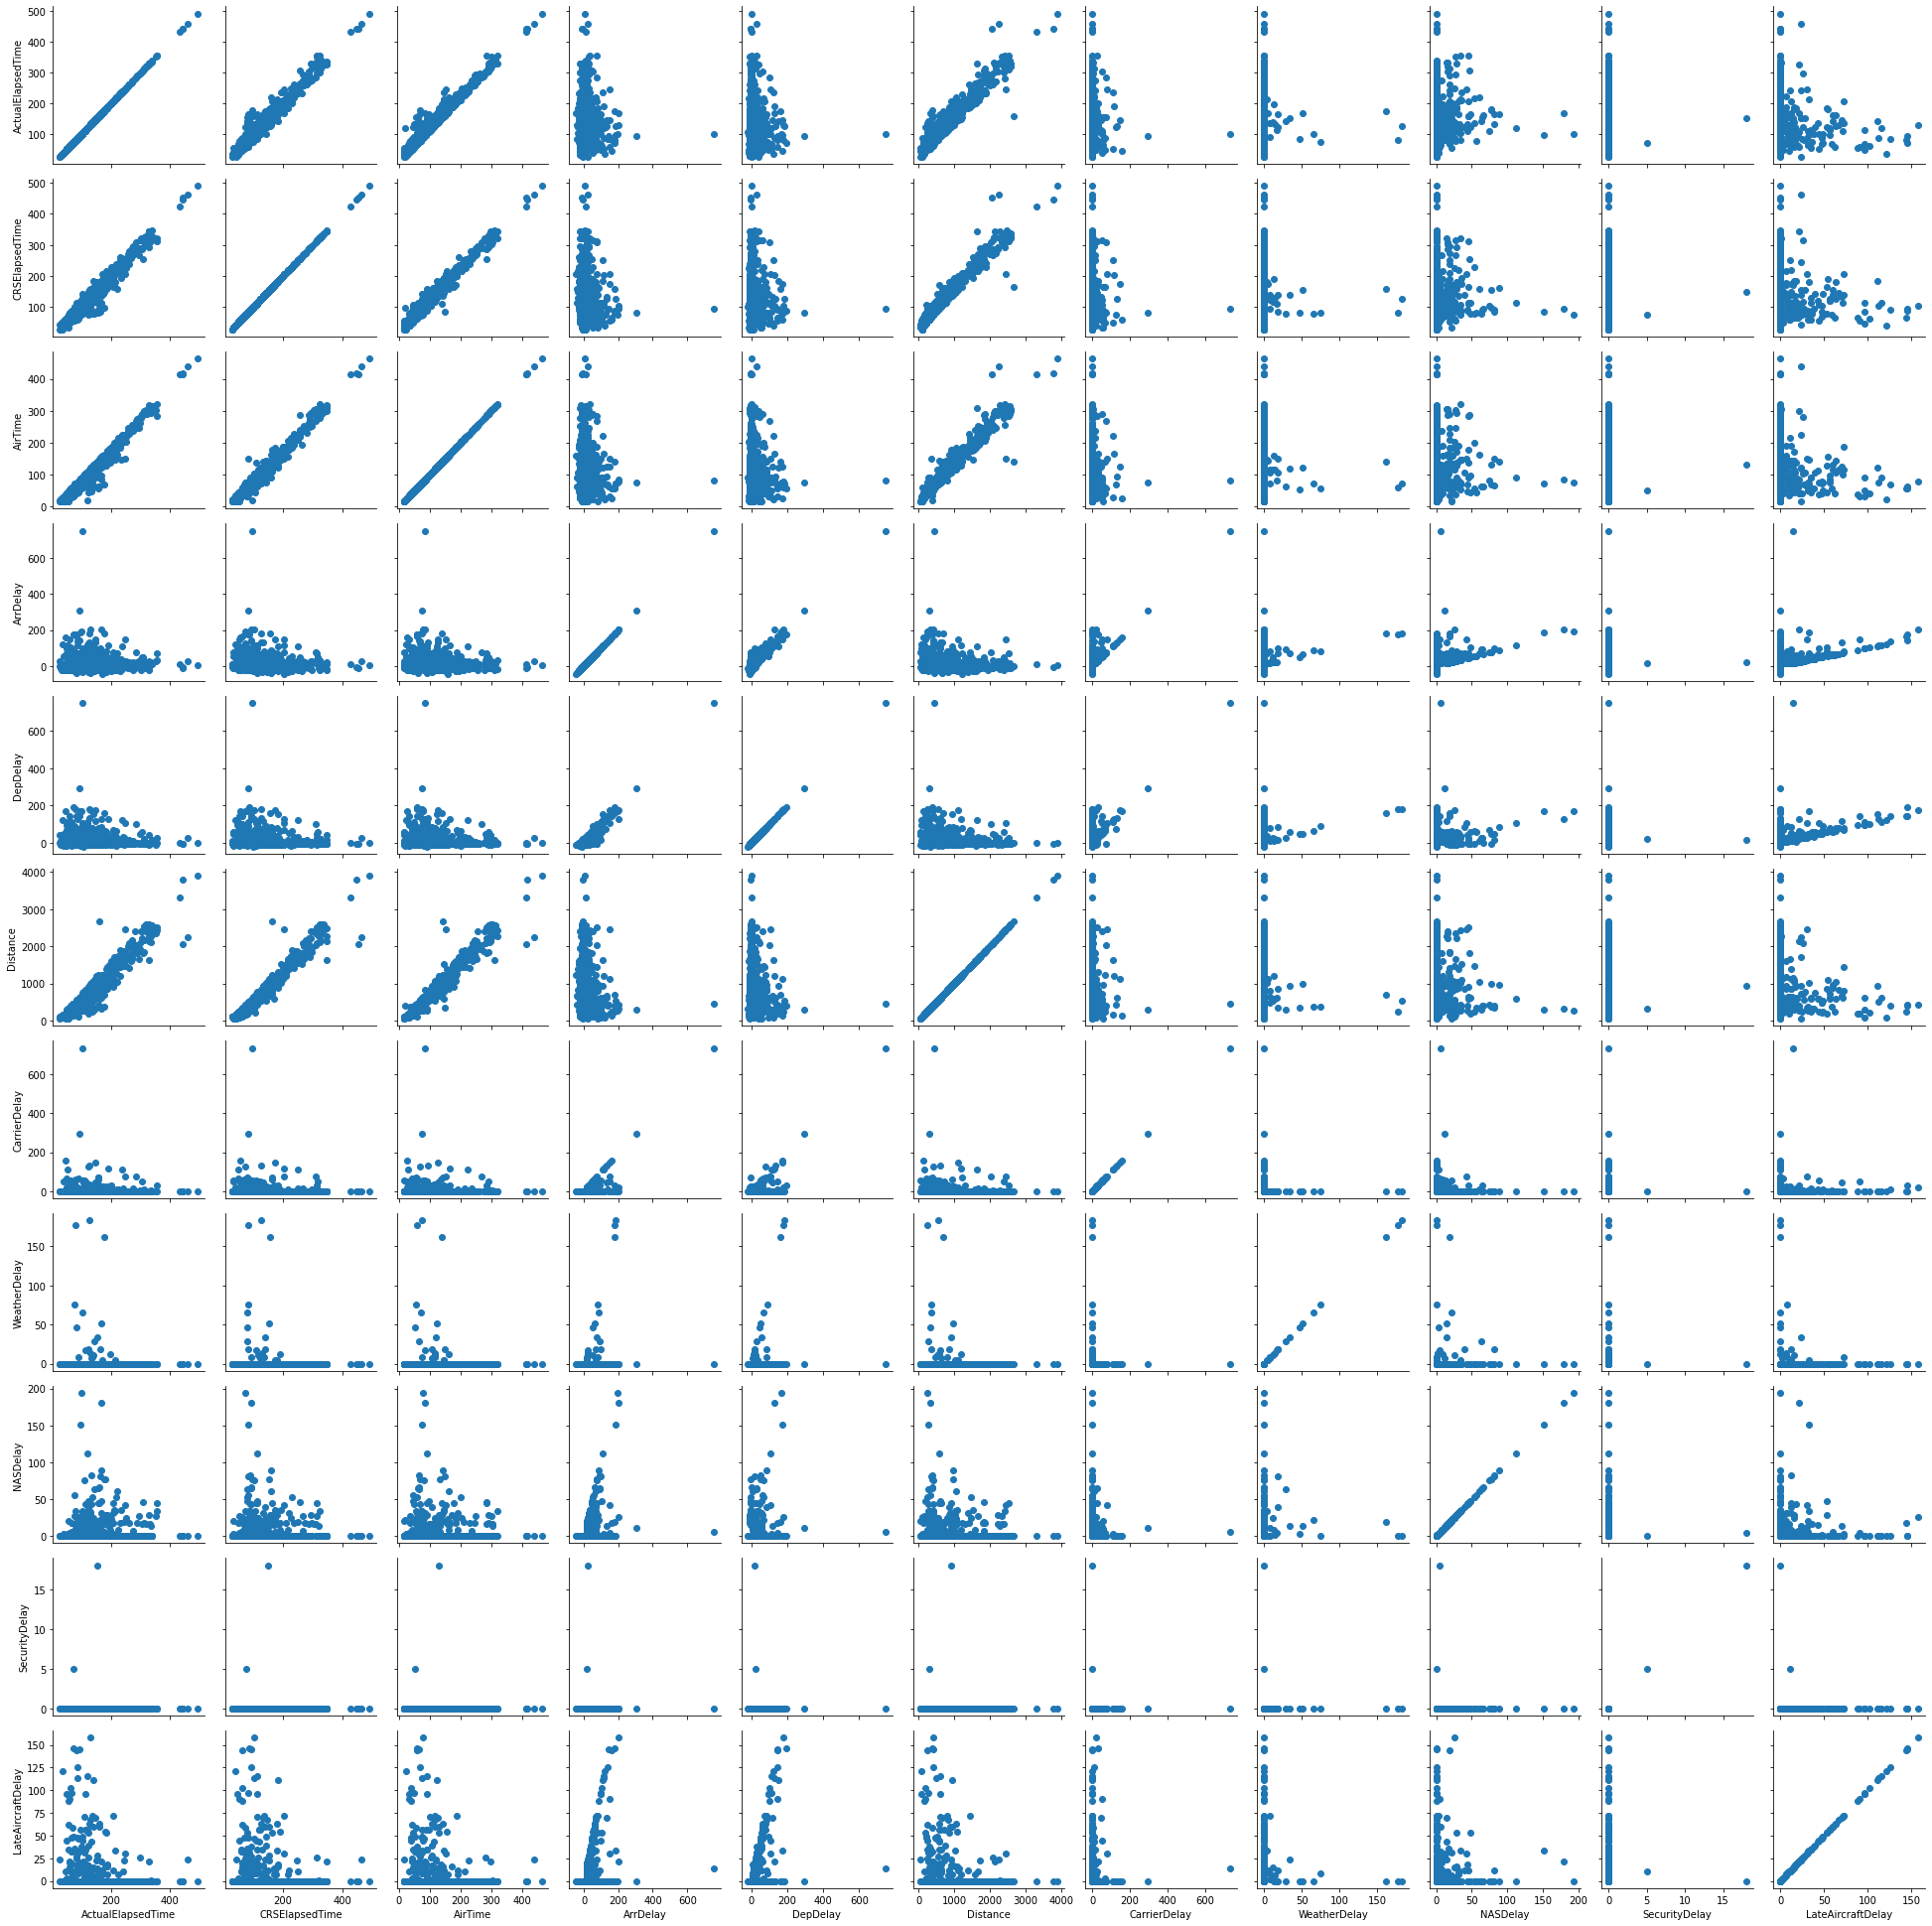

In [ ]:
#Checking the correlation between numeric variables using scatterplot matrix
#I will need to sample my data because I only have Google Colab to work and with all data in runs out of RAM. 
#Sample Size 1000 flights
samples = np.random.choice(df2007.shape[0], 1000, replace=False)
df2_sample = df2007.iloc[samples,:]

g = sns.PairGrid(data=df2_sample, vars=numeric_vars)
#g = g.map_diag(plt.hist, bins = 30);
g.map(plt.scatter);

It is possible to see that distance and airtime are strongly positive correlated, this can be expected because the longer the distance the longer it will take to a flight to complete it. I was able to also check that arrival delay have positive correlation with departure delay and by that we can infer that when a flight has a departure delay the longer will be its arrival delay.

The longer the distance, the longer is the delay elapsed? Let's check!!

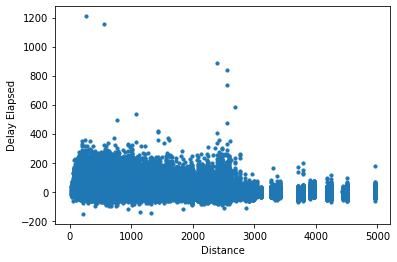

In [ ]:
#Lets create a ElapsedDelay to check if the longer the distance the longer can be the delay
df2007["delay_elapsed"] = df2007.ActualElapsedTime - df2007.CRSElapsedTime
plt.scatter(data=df2007, x="Distance", y="delay_elapsed", s=10)
plt.xlabel("Distance") 
plt.ylabel("Delay Elapsed");

Text(0, 0.5, 'Delay Elapsed')

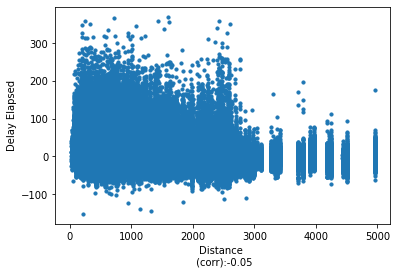

In [ ]:
#Removing the outliers to better see the distribution
df_delay = df2007[ df2007.delay_elapsed < 400]
plt.scatter(data=df_delay, x="Distance", y="delay_elapsed", s=10)
plt.xlabel(f"Distance \n (corr):{df_delay['Distance'].corr(df_delay['delay_elapsed']).round(2)}")
plt.ylabel("Delay Elapsed")

Distance and Delay Elapsed are not strongly correlated.

How about the correlation between distance and elapsed air time? Are they related?

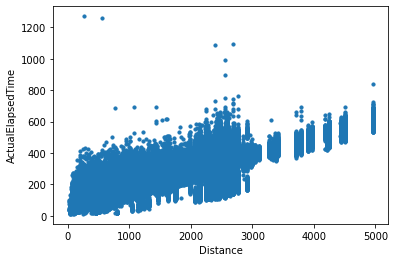

In [ ]:
#Checking the distribution between Distance and elapsedairtime
plt.scatter(data=df2007, x="Distance", y="ActualElapsedTime", s=10)
plt.xlabel("Distance") 
plt.ylabel("ActualElapsedTime");


There is some long flights (>3000 miles) probabily from or to Hawaii. Let's check!


In [ ]:
#Checking by destination
df2007[(df2007.Distance>3000)].Dest.value_counts()

HNL    3983
DFW    1236
IAH     991
ORD     988
OGG     733
ATL     718
ANC     618
DEN     518
MSP     363
EWR     362
SJU     222
LAX     222
CVG     196
KOA      46
LIH       2
Name: Dest, dtype: int64

In [ ]:
#Checking by origin
df2007[(df2007.Distance>3000)].Origin.value_counts()

HNL    3978
DFW    1241
IAH     991
ORD     988
ATL     720
ANC     616
DEN     519
OGG     478
MSP     365
EWR     363
KOA     298
SJU     222
LAX     222
CVG     195
LIH       2
Name: Origin, dtype: int64

Most flights are from Hawaii. I'll exclude them.

In [ ]:
#Selecting Hawaii airports
hawaii = ["HNL", "OGG", "KOA"]
#Deleting all the flight data from or to Hawaii
df2007[(df2007.Origin.isin(hawaii)) | (df2007.Dest.isin(hawaii))].shape[0]
df2007 = df2007[(df2007.Origin.isin(hawaii)) | (df2007.Dest.isin(hawaii)) == 0]

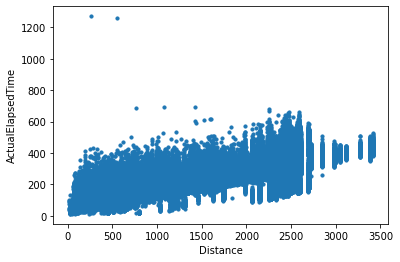

In [ ]:
#Checking again the distribution between Distance and elapsedairtime after t
plt.scatter(data=df2007, x="Distance", y="ActualElapsedTime", s=10)
plt.xlabel("Distance") 
plt.ylabel("ActualElapsedTime");

We removed those flights but the distribution looks like the same. There is some linear correlation, but not a strong one.

How is the correlation between distance and delays?

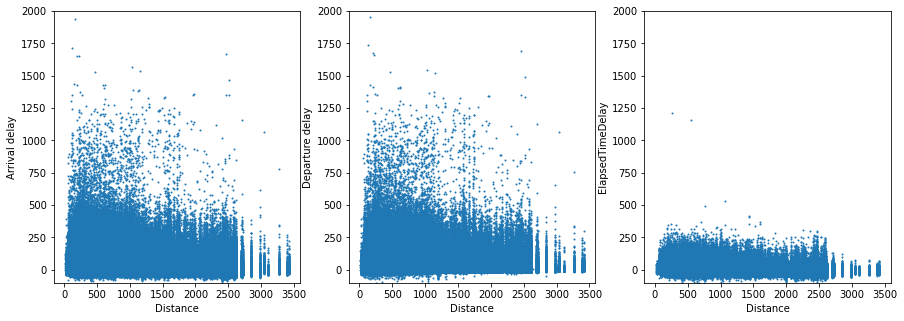

In [ ]:
#Checking the distribution between Distance and Delays
plt.figure(figsize=[15,5])

plt.subplot(1,3,1)
plt.scatter(data=df2007, x="Distance", y="ArrDelay", s=1)
plt.xlabel("Distance")
plt.ylabel("Arrival delay")
plt.ylim([-100,2000]);

plt.subplot(1,3,2)
plt.scatter(data=df2007, x="Distance", y="DepDelay", s=1)
plt.xlabel("Distance")
plt.ylabel("Departure delay")
plt.ylim([-100,2000]);

plt.subplot(1,3,3)
plt.scatter(data=df2007, x="Distance", y="delay_elapsed", s=1)
plt.xlabel("Distance")
plt.ylabel("ElapsedTimeDelay")
plt.ylim([-100,2000]);

It does not seems that arrival or departure delay are related to the flight distances.



How was the elapsed delay by each carrier in 2007?

In [ ]:
#Checking the number of flights per carrier
df2007.groupby('UniqueCarrier').FlightNum.count().sort_values(ascending=False)

UniqueCarrier
Southwest Airlines      1158878
American Airlines        607403
SkyWest Airlines         583696
Envoy Air                517702
US Airways               473899
Delta Air Lines          464380
United Airlines          463949
JetSuiteX                423973
NorthWest Airlines       400888
Continental Airlines     317288
ExpressJet Airlines      277314
Mesa Airlines            262452
AirTran Airways          260557
Endeavor                 250912
PSA Airlines             224936
JetBlue Airlines         187740
Alaska Airlines          157413
Frontier Airlines         97335
9 Air Co Ltd               2502
Hawaiian Airlines             2
Name: FlightNum, dtype: int64

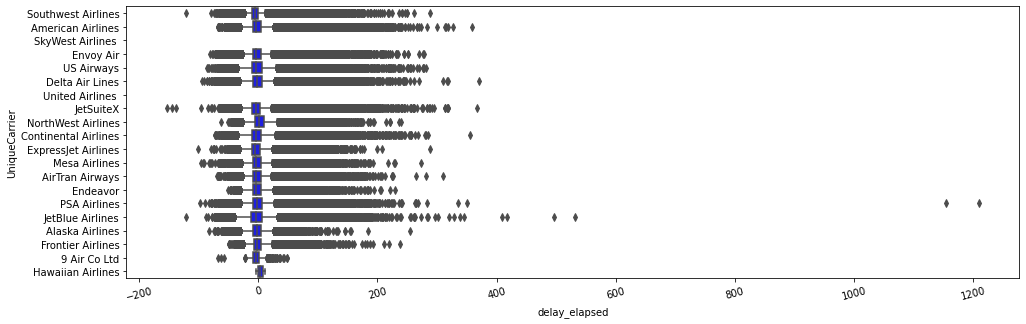

In [ ]:
plt.figure(figsize = [16, 5])
#Plotting the distribution
carrier = ['Southwest Airlines',
           'American Airlines',
           'SkyWest Airlines ',
           'Envoy Air',
           'US Airways',
           'Delta Air Lines',
           'United Airlines ',
           'JetSuiteX',
           'NorthWest Airlines',
           'Continental Airlines',
           'ExpressJet Airlines',
           'Mesa Airlines',
           'AirTran Airways',
           'Endeavor',
           'PSA Airlines',
           'JetBlue Airlines',
           'Alaska Airlines',
           'Frontier Airlines',
           '9 Air Co Ltd',
           'Hawaiian Airlines']
# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=carrier)
# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
df2007['UniqueCarrier'] = df2007['UniqueCarrier'].astype(vclasses);
sns.boxplot(data=df2007, y='UniqueCarrier', x='delay_elapsed' , color='blue')
plt.xticks(rotation=15);

As expected every company has big outliers (Shit happens). But the quartiles from all companies are around 0-100 minutes. Some companies like SkyWest Airlines and United Airlines don't havy any delay. Weird!

#### Multivariate Analysis:


Which months had more delay in 2007?

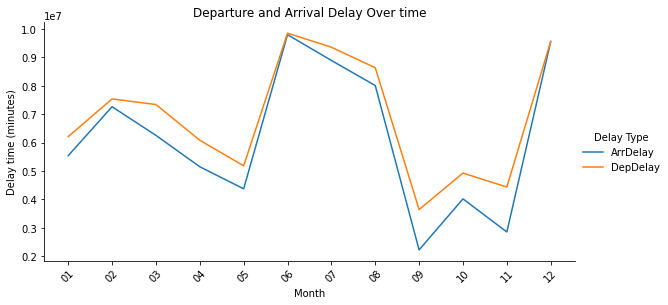

In [ ]:
#Creating line chart to see which month has more arrival delays and departure delays
#Grouping the data
arrival_delay_month = df2007.groupby('Month', as_index=False)['ArrDelay'].sum()
departure_delay__month = df2007.groupby('Month', as_index=False)['DepDelay'].sum()
#Joining data in the same dataframe
arrival_departure_delay_month = pd.merge(arrival_delay_month, departure_delay__month, on = "Month", how = "inner")
#Formating month digits to two digits
arrival_departure_delay_month_sorted['Month'] = arrival_departure_delay_month_sorted['Month'].astype(int);
arrival_departure_delay_month_sorted["Month"] = arrival_departure_delay_month_sorted.Month.map("{:02}".format)
#Sorting data in ascending
arrival_departure_delay_month_sorted = arrival_departure_delay_month_sorted.sort_values(by=['Month'], ascending=True)
#Creating line chart
arrival_departure_delay_month_melted = arrival_departure_delay_month_sorted.melt("Month",var_name="Delay Type",value_name="Sum")
ax = sns.relplot(data = arrival_departure_delay_month_melted, x='Month', y='Sum' , hue='Delay Type',kind='line', height=4, aspect=2)
ax.set(title='Departure and Arrival Delay Over time', xlabel='Month', ylabel='Delay time (minutes)')
ax.set_xticklabels(rotation=45)
plt.show()

Looks like in 2007 there were more delays in June, July and August. Probabily this was the busiest time of the year, since it is summer in the US.

Which distance had more delays when we consider arrival delay and departure delay apart?

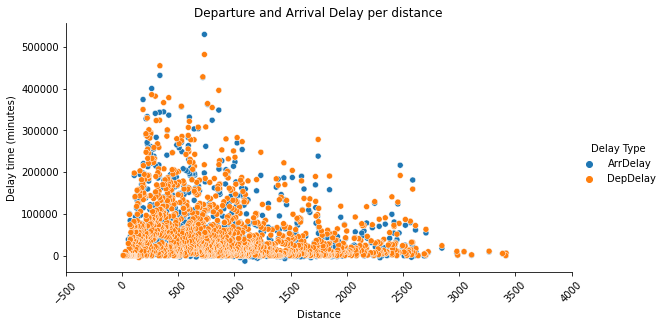

In [ ]:
#Creating scatter plot to see which distance has more delays categorized by delay time
#Grouping the data
arrival_delay_distance = df2007.groupby('Distance', as_index=False)['ArrDelay'].sum()
departure_delay_distance = df2007.groupby('Distance', as_index=False)['DepDelay'].sum()
#Joining data in the same dataframe
arrival_departure_delay_distance = pd.merge(arrival_delay_distance, departure_delay_distance, on = "Distance", how = "inner")
#Sorting data in ascending
arrival_departure_delay_distance_sorted = arrival_departure_delay_distance.sort_values(by=['Distance'], ascending=False)
#Creating line chart
arrival_departure_delay_distance_melted = arrival_departure_delay_distance_sorted.melt("Distance",var_name="Delay Type",value_name="Sum")
ax = sns.relplot(data = arrival_departure_delay_distance_melted, x='Distance', y='Sum' , hue='Delay Type',kind='scatter', height=4, aspect=2)
ax.set(title='Departure and Arrival Delay per distance', xlabel='Distance', ylabel='Delay time (minutes)')
ax.set_xticklabels(rotation=45)
plt.show()

Delay type does not change when we consider distance vs total delay time.

Which carrier had more delays when considering apart and departure delays apart?

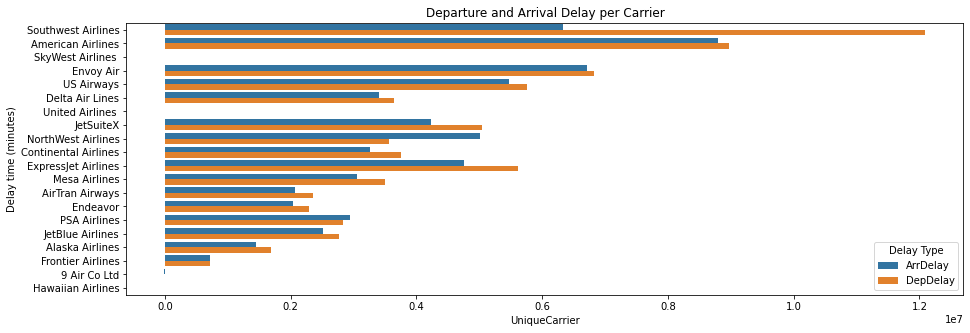

In [ ]:
plt.figure(figsize=[15,5])
#Creating scatter plot to see which distance has more delays categorized by Carrier
#Grouping the data
arrival_delay_carrier = df2007.groupby('UniqueCarrier', as_index=False)['ArrDelay'].sum()
departure_delay_carrier = df2007.groupby('UniqueCarrier', as_index=False)['DepDelay'].sum()
#Joining data in the same dataframe
arrival_departure_delay_carrier = pd.merge(arrival_delay_carrier, departure_delay_carrier, on = "UniqueCarrier", how = "inner")
#Creating stacked bar chart
arrival_departure_delay_carrier_melted = arrival_departure_delay_carrier.melt("UniqueCarrier",var_name="Delay Type",value_name="Sum")
ax = sns.barplot(data = arrival_departure_delay_carrier_melted, y='UniqueCarrier', x='Sum' , hue='Delay Type' )
ax.set(title='Departure and Arrival Delay per Carrier', xlabel='UniqueCarrier', ylabel='Delay time (minutes)')
plt.show()

Departure delay is the most commom form of delay. SouthWest and American Airlines are the company with the higher number of delays, probably because they have more flights.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I found that distance and airtime are strongly positive correlated, this can be expected because the longer the distance the longer it will take to a flight to complete it. I was able to also check that arrival delay have positive correlation with departure delay and by that we can infer that when a flight has a departure delay the longer will be its arrival delay. Other interesting discovery was that Distance does not strongly affect the delay time. This is true for both DepartureDelay and ElapsedTimeDelay. So, long haul flights does not necessary mean more delay.

### Were there any interesting or surprising interactions between features?

> As said above, Elapsed Delay Time has not a strong correlation with Distance, the pearson correlation found was -0.05. I found that coefficient after check all delays X distances and discover that most outliers were all in the flight data from or to Hawaiian airport. So, to better see the distribution I decide to delete all the flight data from or to Hawaii.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!